In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Loading data into pandas dataframe
path = "../../data/clean/"
def read_year(y):
    file = "ports_{}.csv".format(y)
    print(file)
    return pd.read_csv(path + file, index_col=False)
years = [2015, 2016, 2017, 2018]

In [3]:
df_list = [read_year(x) for x in years]

ports_2015.csv
ports_2016.csv
ports_2017.csv
ports_2018.csv


In [8]:
# df_list[0].tail(20)

In [44]:
total_year = {}
for i, y in enumerate(years):
    print(y)
#     numpy_version = df_list[i]
#     reduced = np.nansum(numpy_version, axis=1)   
    total_year[y] = np.nansum(df_list[i], axis=1)    

2015
2016
2017
2018


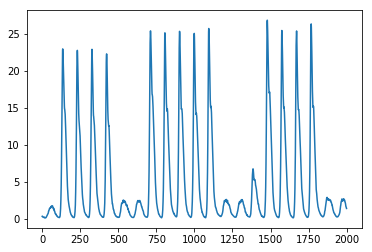

In [33]:
# MW
plt.plot(total_year[2018][:2000]*4/1000)

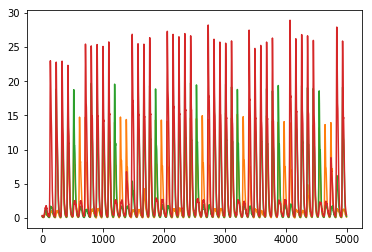

In [34]:
for y, total in total_year.items():
    plt.plot(total[:5000]*4/1000)

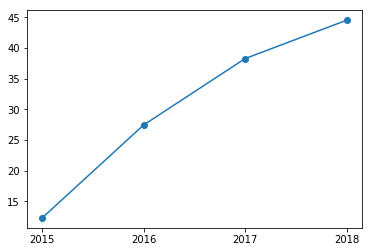

In [45]:
# yearly GWh charged:
yearly_sum = [np.nansum(total_year[y])/1e6 for y in years]
plt.plot([str(y) for y in years], yearly_sum, 'o-')

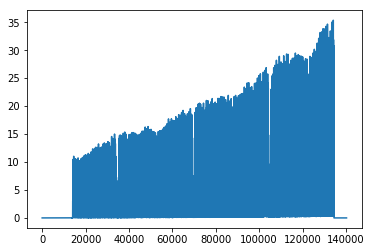

In [46]:
all_mw = np.concatenate([total_year[y]for y in years], axis=0) *4 /1e3
plt.plot(all_mw)

0
365
52


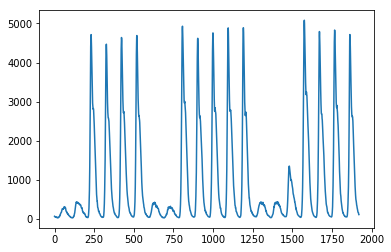

In [112]:
# print(sum(np.isnan(all_mw)))

start_date = 96*7*21 +4*96 
# plt.plot(all_mw[96*7*21: 96*7*25])

end_date = start_date + 96*7*178 +1
# plt.plot(all_mw[start_date : ][96*7*177 : 96*7*179])

ts = all_mw[start_date : end_date]
# or just 2017:
# ts = all_mw[96*(365+366) : 96*(365+366+365)]
ts = np.nansum(df_list[2], axis=1)

print(len(ts) % 96)
print(len(ts) // 96)
print(len(ts) // 96 // 7)
plt.plot(ts[:96*7*3 - 96])


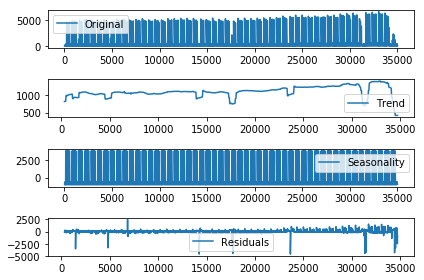

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
# all_series = pd.Series(all_mw)
decomposition = seasonal_decompose(ts, freq=96*7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [120]:
# compare to doing a decomposition for each port
df = df_list[2]
array = np.zeros(list(df.shape) + [4])
array[:, :, 0] = df.values

# port_decompositions = {"trend": {}, "seasonal": {}, "residual": {},}
for i, p in enumerate(df.columns.values):
    if i%100==0:
        print(i / len(df.columns.values))
    decomposition = seasonal_decompose(array[:,i, 0], freq=96*7)
    array[:,i, 1] = decomposition.trend
    array[:,i, 2] = decomposition.seasonal
    array[:,i, 3] = decomposition.resid
#     port_decompositions["trend"][p] = decomposition.trend
#     port_decompositions["seasonal"][p] = decomposition.seasonal
#     port_decompositions["residual"][p] = decomposition.resid

0.0
0.00856898029134533
0.01713796058269066
0.02570694087403599
0.03427592116538132
0.04284490145672665
0.05141388174807198
0.05998286203941731
0.06855184233076264
0.07712082262210797
0.0856898029134533
0.09425878320479864
0.10282776349614396
0.11139674378748929
0.11996572407883462
0.12853470437017994
0.13710368466152528
0.1456726649528706
0.15424164524421594
0.16281062553556128
0.1713796058269066
0.17994858611825193
0.18851756640959727
0.19708654670094258
0.20565552699228792
0.21422450728363324
0.22279348757497858
0.23136246786632392
0.23993144815766923
0.24850042844901457
0.2570694087403599
0.2656383890317052
0.27420736932305056
0.2827763496143959
0.2913453299057412
0.29991431019708653
0.30848329048843187
0.3170522707797772
0.32562125107112255
0.3341902313624679
0.3427592116538132
0.3513281919451585
0.35989717223650386
0.3684661525278492
0.37703513281919454
0.3856041131105398
0.39417309340188517
0.4027420736932305
0.41131105398457585
0.4198800342759212
0.4284490145672665
0.4370179948

In [ ]:
# add up

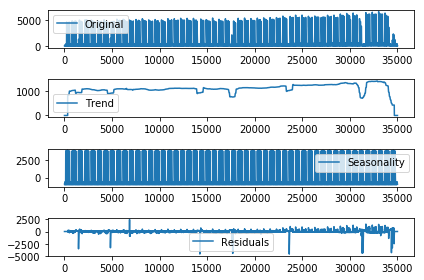

In [121]:
trend_add = np.nansum(array[:,:,1], axis=1)
seasonal_add = np.nansum(array[:,:,2], axis=1)
residual_add = np.nansum(array[:,:,3], axis=1)

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_add, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_add,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_add, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [123]:
print(np.nansum(trend), np.nansum(trend_add))
print(np.nansum(seasonal), np.nansum(seasonal_add))
print(np.nansum(residual), np.nansum(residual_add))

37905483.51629922 37905483.51629922
-81133.12391336261 -81133.12391336291
-1675.6459269508086 -1675.6459269550542


In [ ]:
# Autoregression

In [125]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = np.nansum(df_list[2], axis=1)
# fit model
model = AR(data)#, freq=7*96)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)


[93.90069362]
